**Check Point Stock Prediction Using fbprophet By Facebook**

In [39]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from fbprophet import Prophet


In [76]:
m = Prophet(weekly_seasonality=False,yearly_seasonality=False, daily_seasonality=True)

In [95]:
df = pd.read_csv('C:/Users/jonathanbe/Downloads/CHKP.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4938,2019-08-19,108.660004,109.089996,108.080002,108.769997,108.769997,524200
4939,2019-08-20,108.699997,109.220001,107.940002,108.470001,108.470001,708800
4940,2019-08-21,109.190002,109.989998,108.610001,109.209999,109.209999,630200
4941,2019-08-22,109.290001,110.000000,108.129997,108.980003,108.980003,680400
4942,2019-08-23,108.559998,109.160004,106.510002,106.800003,106.800003,842500


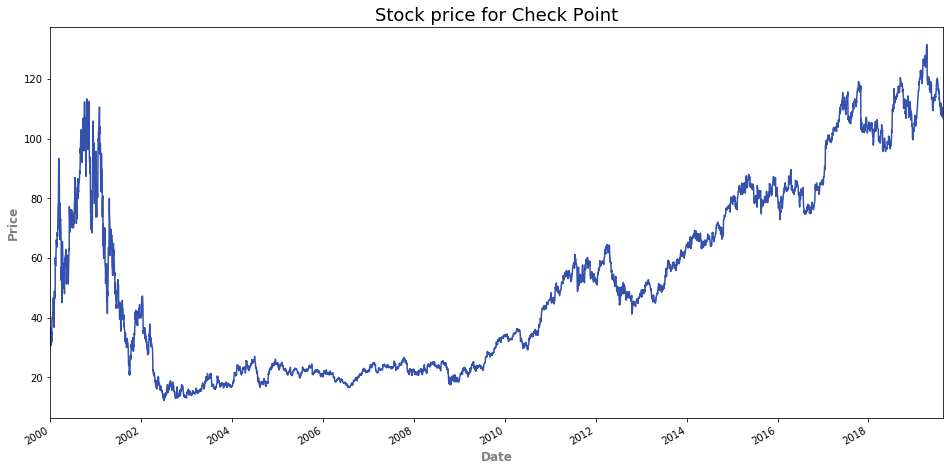

In [78]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df['Adj Close'].plot(figsize=(16,8),color='#002699',alpha=0.8)
plt.xlabel("Date",fontsize=12,fontweight='bold',color='gray')
plt.ylabel('Price',fontsize=12,fontweight='bold',color='gray')
plt.title("Stock price for Check Point",fontsize=18)
plt.show()

In [79]:
df.columns = ['ds','Open','High',
                     'Low','Close','y','Volume']
m.fit(df)

C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [80]:
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,1999-12-31,43.133641,35.194013,51.288343
1,2000-01-03,43.788689,36.115187,51.175912
2,2000-01-04,44.007038,36.730415,51.061381
3,2000-01-05,44.225387,36.535537,52.245838
4,2000-01-06,44.443736,37.384108,52.081002


In [81]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
5303,2020-08-18,129.753915,119.439573,140.788343
5304,2020-08-19,129.781316,118.420491,141.068565
5305,2020-08-20,129.808718,118.367335,140.927733
5306,2020-08-21,129.836120,118.494993,141.809010
5307,2020-08-22,129.863522,118.366871,141.680524


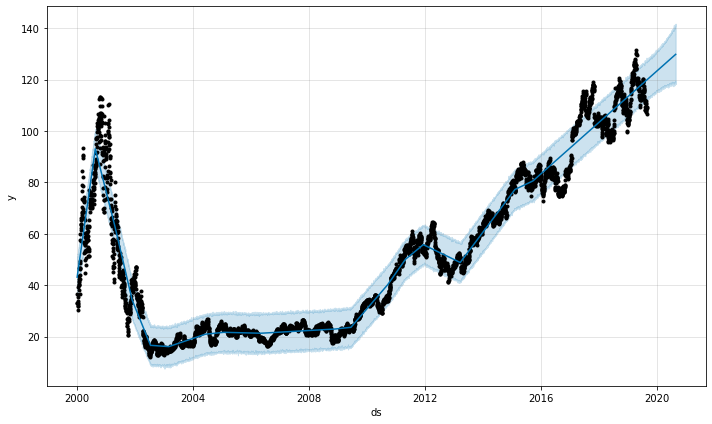

In [82]:
#We plot our actual predicion compared to the actual adjusted closing price
fig1 = m.plot(forecast)

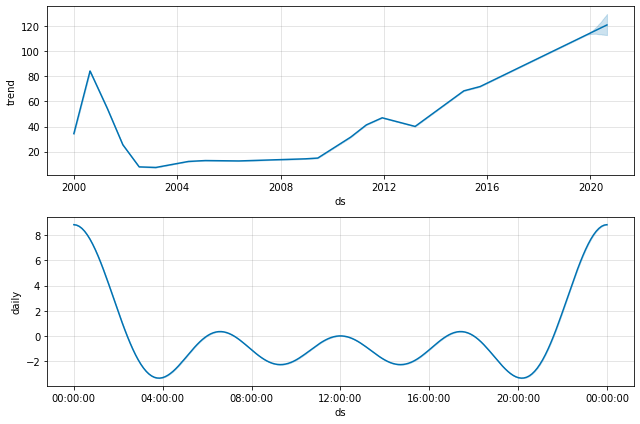

In [83]:
fig2 = m.plot_components(forecast)


**Measurement of accuracy of model:**

In [84]:
from fbprophet.diagnostics import cross_validation

In [85]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 34 forecasts with cutoffs between 2002-05-19 00:00:00 and 2018-08-23 00:00:00
C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(f

C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\jonathanbe\AppData\Local\Con

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2002-05-20,24.187791,11.946854,36.051848,19.799999,2002-05-19
1,2002-05-21,24.133731,12.412870,35.210161,18.750000,2002-05-19
2,2002-05-22,24.079670,12.615380,36.948384,17.320000,2002-05-19
3,2002-05-23,24.025610,12.376186,36.627368,18.010000,2002-05-19
4,2002-05-24,23.971549,12.365700,37.127465,18.000000,2002-05-19


In [86]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,37 days,45.229532,6.725290,5.386813,0.131157,0.710819
1,38 days,46.079572,6.788194,5.442710,0.133051,0.704971
2,39 days,46.868218,6.846037,5.489561,0.134022,0.698398
3,40 days,47.415643,6.885902,5.520721,0.135037,0.695111
4,41 days,47.754866,6.910490,5.542579,0.135515,0.691602


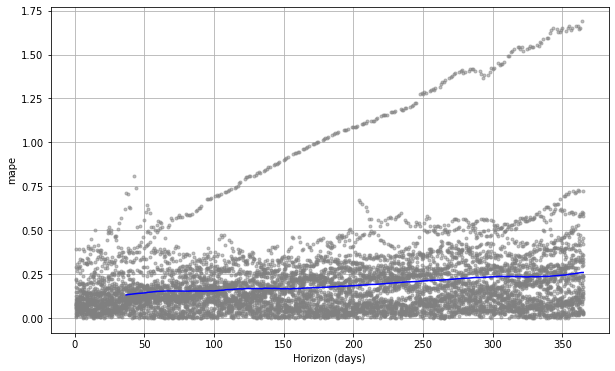

In [87]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

**Using MAPE - mean absolute percentage error, we see that the error rate is around 12% in the beginning and continues to be around 26% as time goes by**

In [100]:
df_SP500 = pd.read_csv('C:/Users/jonathanbe/Downloads/CSCO.csv')
#df_SP500.head()
df = pd.read_csv('C:/Users/jonathanbe/Downloads/CHKP.csv')
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

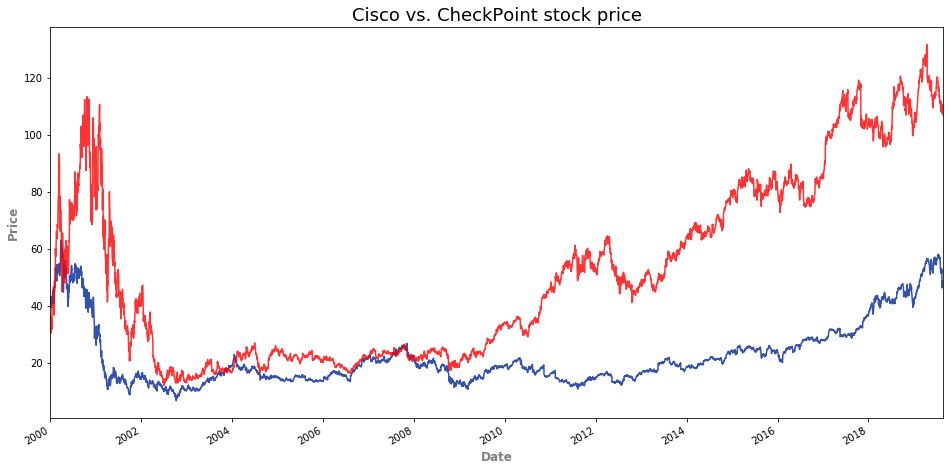

In [101]:
df_SP500['Date'] = pd.to_datetime(df_SP500.Date,format='%Y-%m-%d')
df_SP500.index = df_SP500['Date']
df_SP500['Adj Close'].plot(figsize=(16,8),color='#002699',alpha=0.8)
df['Adj Close'].plot(figsize=(16,8),color='red',alpha=0.8)
plt.xlabel("Date",fontsize=12,fontweight='bold',color='gray')
plt.ylabel('Price',fontsize=12,fontweight='bold',color='gray')
plt.title("Cisco vs. CheckPoint stock price",fontsize=18)
plt.show()

**We can see that CP stock is on the rise but not enough compared to other competitor**